<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/main/activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>신경망</h1>
퍼셉트론은 복잡한 함수도 구현이 가능했다. 하지만 가중치를 우리가 일일히 값을 적절히 정해야한다.신경망은 이 수동적인 작업을 해결해준다. 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

<hr>
<h1>신경망 구조</h1>
신경망은 맨 왼쪽줄은 입력층, 맨 오른쪽은 출력층, 중간 줄을 은닉층이라고 한다. 말 그대로 은닉층은 우리들 눈에 안보이기 때문이다.<br>

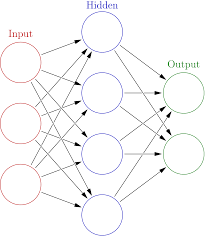
<br> 그림1 신경망의 예
<br>
입력층에서 출력층 방향대로 0,1,2층으로 부른다.

<h1>퍼셉트론 수정</h1>
이 사진은 퍼셉트론에 편향을 넣었다.편형의 입력신호는 항상 1이기 때문에 1로 고정되어있다.

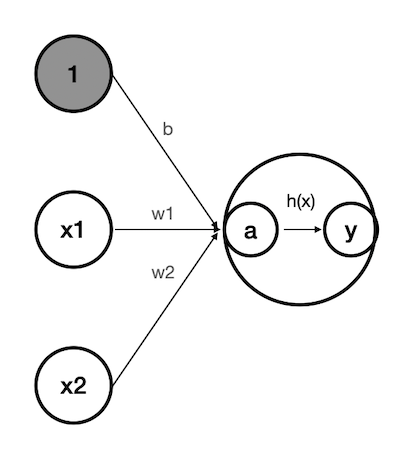

<br>
그림2 새로운 퍼셉트론 그림 
<br>
이제부터 y=h(b+w1x1+w2x2), h라는 하나의 함수로 나타난다.h(x)함수는 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려준다. 결과적으로 하는 일은 똑같다. 이 h(x)를 활성화 함수라고 한다.이미지에서 더욱 중요한것은 우측 가장 큰 원이다.
가중치가 달린 입력 신호와 편향의 총합을 계산한 것을 a라 한다. 그리고 a를 h()에 넣어 y를 출력한다. 그래서 결과가 a라는 노드가 되고 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정이 나타나있다.
<hr>
<h1>활성화 함수(계단 함수 시그모이드 함수</h1>
활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다. 
<h2>시그모이드 함수</h2>
자주 이용하는 활성화 함수인 시그모이드 함수이다.

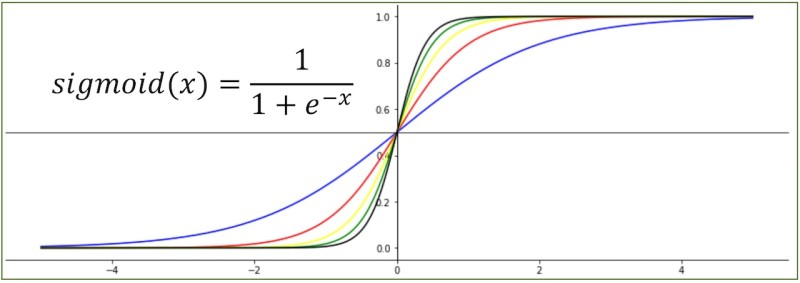

<br>
그림3 시그모이드 함수
<br>
퍼셉트론과 신경망의 주된 차이는 활성화 함수뿐이다. 이제부터 시그모이드 함수와 계단 함수를 비교해보겠다. 
<h2>계단 함수 구현하기</h2>

In [ ]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

0을 넘으면 1출력, 그외는 0 출력안 간단한 함수이다. 인수 x는 실수(부동소수점)만 받아들인다. 즉 step_function(3.0)은 되지만 step_function(np.array([1.0,2.0]))같은 넘파이 배열을 넣을 수는 없다.그렇게 수정해보자. 

In [2]:

import numpy as np
x=np.array([-1.0,1.0,2.0])
x
y=x>0
y

array([False,  True,  True])

넘파이 마스킹 기술을 활용해 true, false 값으로 간편하게 나눈다. 이러면 새로운 배열 y가 생성된다. 이때 y는 bool 배열이다. 그런데 우리는 0이나 1인 int형을 원한다. 그래서 우리는 type을 바꾼다.

In [3]:
y=y.astype(np.int)
y

array([0, 1, 1])

이렇게 바뀐다. 넘파이에서 배열을 자료형으로 변환할 때는 astype() 메서드를 이용한다. 넘파이를 활용해 우리는 배열도 같이 처리할 수 있는 트릭을 알아냈다.
<h2>계단 함수 그래프</h2>

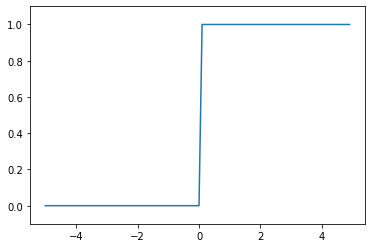

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=np.int)
x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

<h1>시그모이드 함수 구현</h1>

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

np.exp(-x)=exp(-x)에 해당한다. 그리고 인수 x는 넘파이 배열이어도 올바른 결과가 나온다.왜냐하면 브로드캐스트 기능이 있기 때문이다.

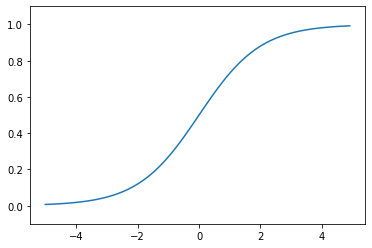

In [5]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

시그모이드 그래프다.
<hr>
<h1>시그모이드 함수와 계단 함수 비교</h1>
일단 '매끄러움'의 차이일 것이다.그리고 계단함수는 0과 1 값만 돌려주는 반면 시그모이드 함수는 0과 1 사이에 모든 실수를 돌려줄 수 있다.그래서 시그모이드는 돌려주는 값을 조절할 수 있다.

<hr>
<h1>비선형 함수</h1>
계단함수와 시그모이드 함수는 비선형 함수이다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야한다. 왜냐하면 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.

<hr>
<h1>ReLU함수</h1>
최근 나온 활성화 함수이다. ReLU는 입력이 0을 넘으면 그대로 출력하고 0이하면 0을 출력하는 함수이다.

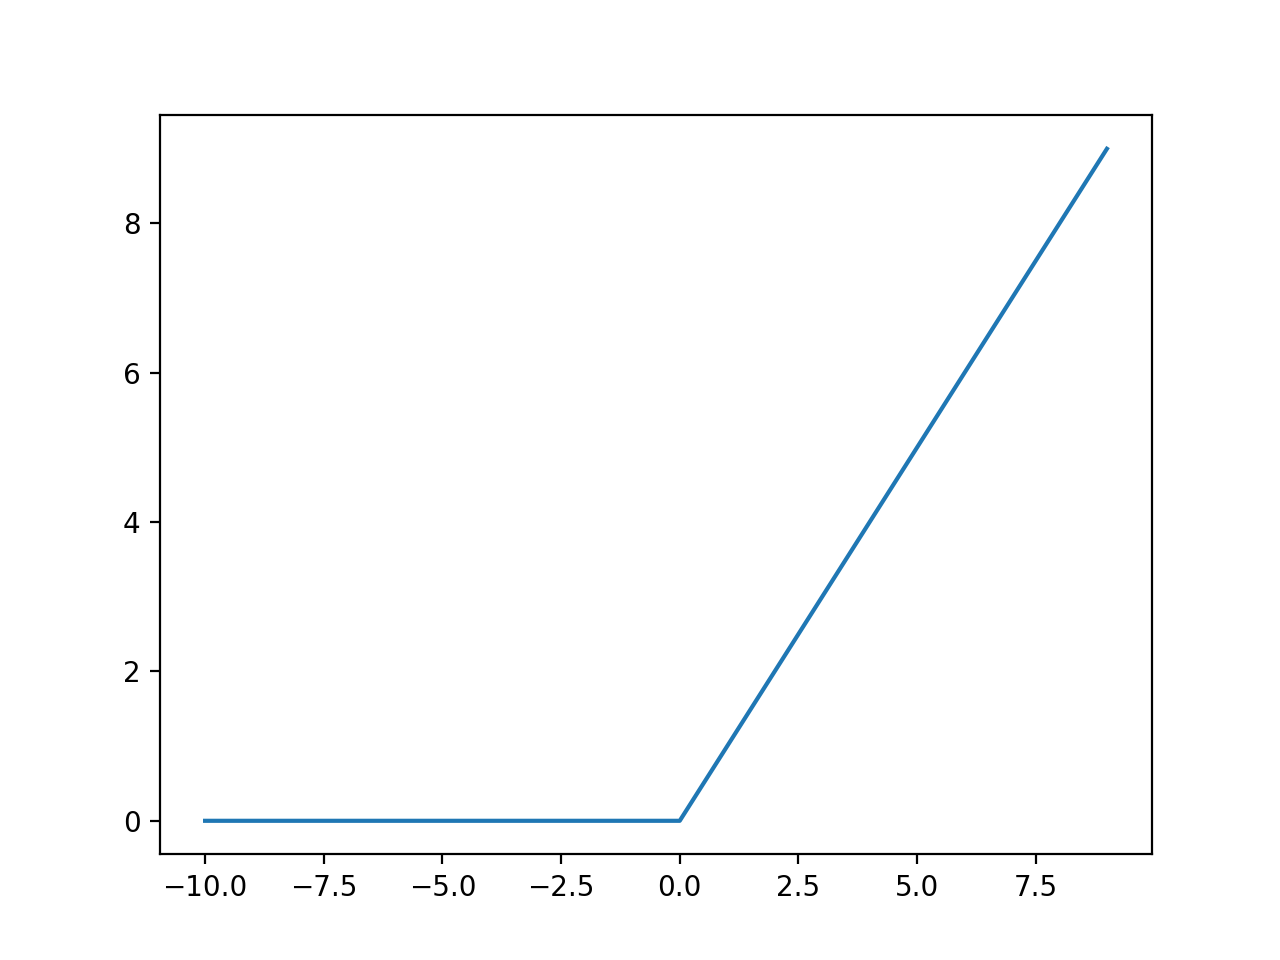

(x>0)일 경우 h(x)=x <br>
(x<0)일 경우 h(x)=0


In [ ]:
def relu(x):
  return np.maximum(0,x)
  

여기서는 넘파이의 maximum 함수를 사용했다.maximum은 두 입력 중 큰 값을 선택해 반환하는 함수이다. <br><br>**여기까지 활성화 함수에 대해 알아봤다.**